### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [60]:
#Import Library
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/WilliamKesuma/Data-Mining/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


1. display 5 columns from dataset

In [61]:
#1
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [62]:
#2
df.info()

#conclusion
#The dataset contains information about applications, 
#with some missing data in the race and admission columns. 
#Most fields are complete, but you'll need to address the missing values during analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [63]:
#3a
admission_counts = df['admission'].value_counts(dropna=False)

admission_counts

NaN         5194
Admit        900
Waitlist     100
Name: admission, dtype: int64

In [64]:
#3b
race_counts = df['race'].value_counts(dropna=False)

race_counts

NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64

4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [65]:
#4
df['admission'] = df['admission'].fillna('deny')
df['race'] = df['race'].fillna('other')

df[['race', 'admission']]

,race,admission
0,Asian,Admit
1,Black,deny
2,other,Admit
3,Black,deny
4,Hispanic,deny
...,...,...
6189,White,deny
6190,Black,deny
6191,other,Admit
6192,other,deny


5. recheck missing value

In [66]:
#5
missing_counts = {
    'Column': df.columns,
    'Missing Values': [df[col].isnull().sum() for col in df.columns],
    'Filled Value': ['N/A' for _ in df.columns]  # You can adjust this to show the specific fill values if applicable
}

missing_df = pd.DataFrame(missing_counts)
print(missing_df)

           Column  Missing Values Filled Value
0  application_id               0          N/A
1          gender               0          N/A
2   international               0          N/A
3             gpa               0          N/A
4           major               0          N/A
5            race               0          N/A
6            gmat               0          N/A
7        work_exp               0          N/A
8   work_industry               0          N/A
9       admission               0          N/A


6. drop application_id column

In [67]:
# 6
df = df.drop(columns=['application_id'])
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,deny
2,Female,True,3.30,Business,other,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,deny


7. show describe column and conclude what the insight is from that column

In [68]:
#7
description = df[['gpa', 'gmat', 'work_exp']].describe()

# Display the descriptive statistics
print(description)

#conclusion
# Most people in this group have strong GPAs, competitive GMAT scores, and moderate work experience (4 to 6 years).

               gpa         gmat     work_exp
count  6194.000000  6194.000000  6194.000000
mean      3.250714   651.092993     5.016952
std       0.151541    49.294883     1.032432
min       2.650000   570.000000     1.000000
25%       3.150000   610.000000     4.000000
50%       3.250000   650.000000     5.000000
75%       3.350000   680.000000     6.000000
max       3.770000   780.000000     9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

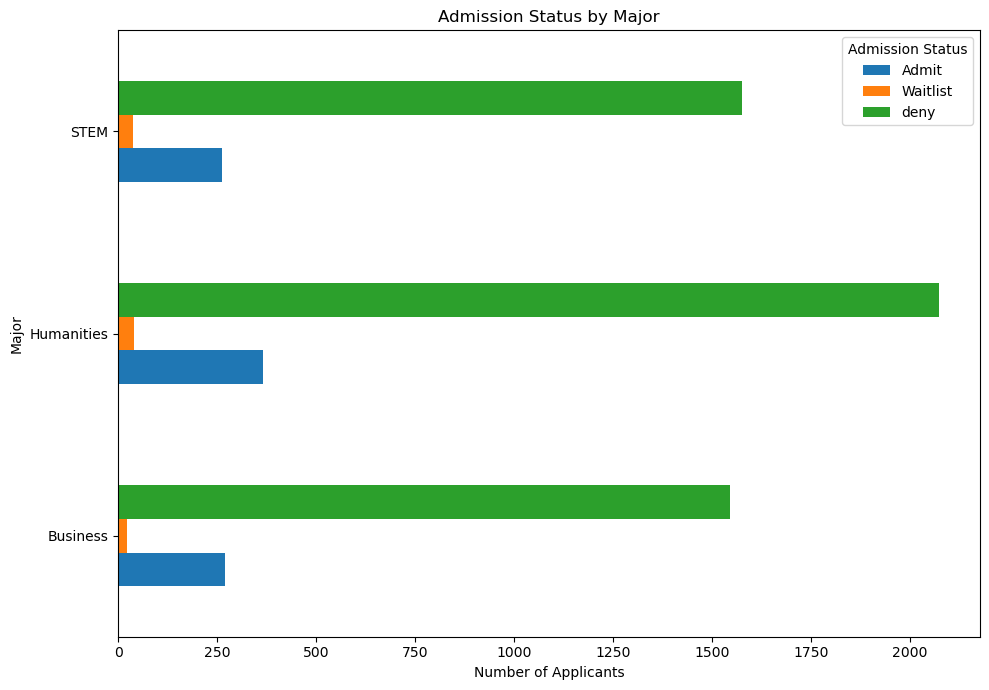

In [69]:
#8

import matplotlib.pyplot as plt

# Group data by 'major' and 'admission', then count occurrences
grouped_data = df.groupby(['major', 'admission']).size().unstack(fill_value=0)

# Create a horizontal bar chart with separate bars (not stacked)
grouped_data.plot(kind='barh', stacked=False, figsize=(10, 7))

# Customize the chart
plt.xlabel('Number of Applicants')
plt.title('Admission Status by Major')
plt.ylabel('Major')
plt.legend(title='Admission Status', loc='upper right')

# Show the chart
plt.tight_layout()
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

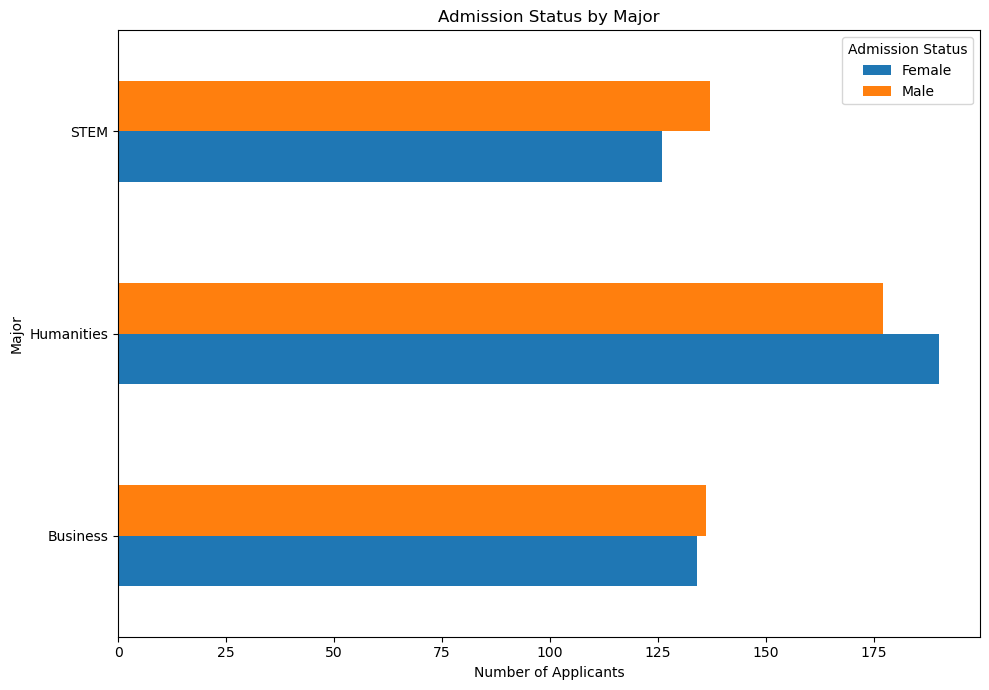

In [70]:
#9

# Filter the DataFrame to include only admitted applicants
admitted_df = df[df['admission'] == "Admit"]


# Group data by major and gender, then count the occurrences
grouped_data = admitted_df.groupby(['major', 'gender']).size().unstack(fill_value=0)

# Create a horizontal bar chart

# Customize the chart

# Show the chart

grouped_data.plot(kind='barh', stacked=False, figsize=(10, 7))

# Customize the chart
plt.xlabel('Number of Applicants')
plt.title('Admission Status by Major')
plt.ylabel('Major')
plt.legend(title='Admission Status', loc='upper right')

# Show the chart
plt.tight_layout()
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

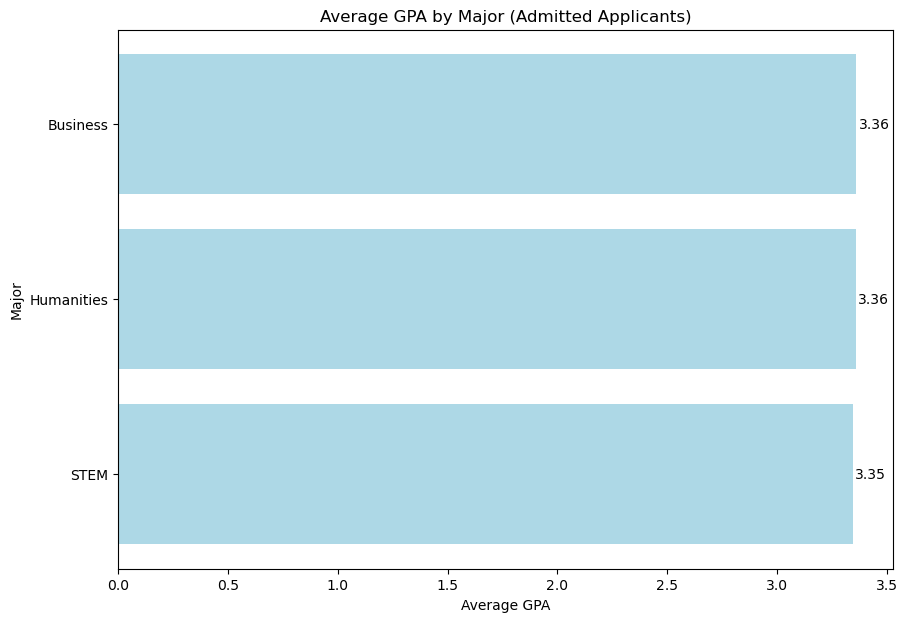

In [71]:
#10

# Group by 'major' and calculate the average GPA of admitted applicants
avg_gpa_per_major = df[df['admission'] == 'Admit'].groupby('major')['gpa'].mean().sort_values()

# Create a horizontal bar chart of average GPA per major for admitted applicants
plt.figure(figsize=(10, 7))
plt.barh(avg_gpa_per_major.index, avg_gpa_per_major.values, color='lightblue')

# Add annotations (values on bars)
for i, v in enumerate(avg_gpa_per_major):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center')

# Add labels and title
plt.title('Average GPA by Major (Admitted Applicants)')
plt.xlabel('Average GPA')
plt.ylabel('Major')

# Show the chart
plt.show()

In [35]:
#This chart shows the average GPA of admitted applicants by major. 
#It helps us understand which majors tend to admit applicants with higher academic performance, indicated by their GPA. 
#The visualization also reveals potential differences in GPA 
#requirements across various fields, allowing us to see which majors might prioritize academic excellence more than others.

#Business and humanities students have an average GPA of 3.36
#While STEM students have an average GPA of 3.35 which is not that far from both business and humanities

11. create your own insightful visualization and explain it in at least 2 sentences

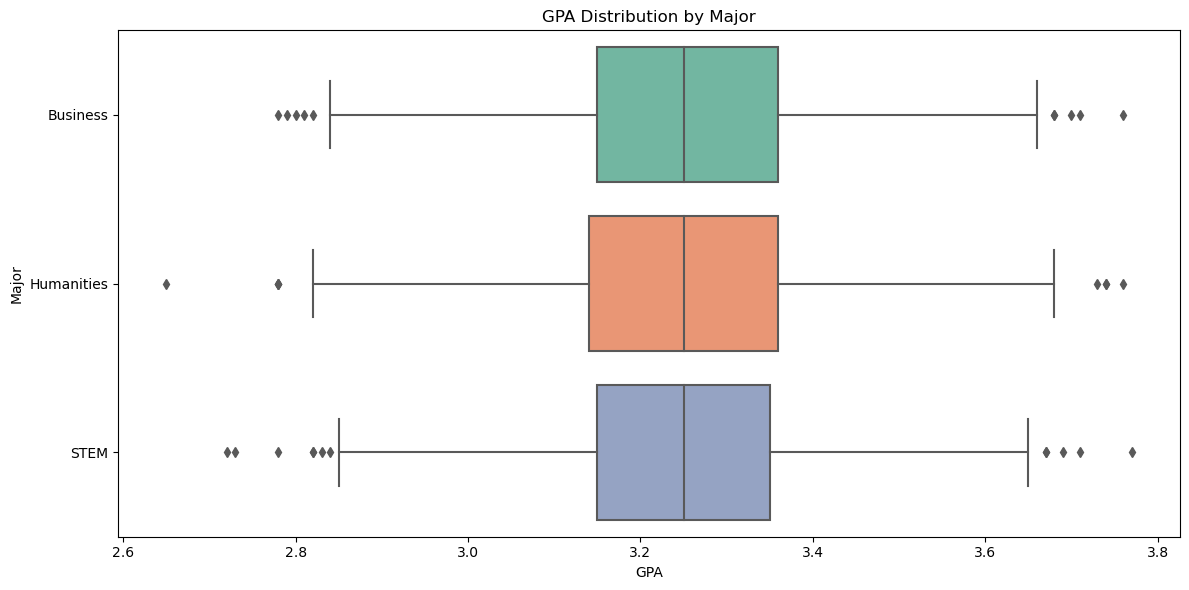

In [72]:
#11
import seaborn as sns
# Create a box plot to visualize the GPA distribution by major
plt.figure(figsize=(12, 6))
sns.boxplot(x='gpa', y='major', data=df, palette='Set2')

# Add title and labels
plt.title('GPA Distribution by Major')
plt.xlabel('GPA')
plt.ylabel('Major')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# The box plot illustrates the GPA distribution by major, 
#showing the median GPA and variability within each major. 
#It highlights differences in academic performance, allowing for quick identification of which majors tend to have higher or lower GPAs and the presence of any outliers.

12. encode categorical columns and display the results

In [73]:
#12

# Encode categorical columns (except the admission column)
# Identify categorical columns (excluding 'admission')
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols.remove('admission')  # Exclude 'admission' column

# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to each categorical column except 'admission'
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Display the first few rows of the encoded DataFrame
print(df.head())

   gender  international   gpa  major  race   gmat  work_exp  work_industry  \
0       0              0  3.30      0     0  620.0       3.0              3   
1       1              0  3.28      1     1  680.0       5.0              6   
2       0              1  3.30      0     5  710.0       5.0             13   
3       1              0  3.47      2     1  690.0       6.0             13   
4       1              0  3.35      2     2  590.0       5.0              1   

  admission  
0     Admit  
1      deny  
2     Admit  
3      deny  
4      deny  


In [74]:
# Encode the admission column
# Create a LabelEncoder instance
ad_le = LabelEncoder()

# Encode the 'admission' column
df['admission'] = ad_le.fit_transform(df['admission'])

# Display the first few rows of the encoded DataFrame
print(df.head())

   gender  international   gpa  major  race   gmat  work_exp  work_industry  \
0       0              0  3.30      0     0  620.0       3.0              3   
1       1              0  3.28      1     1  680.0       5.0              6   
2       0              1  3.30      0     5  710.0       5.0             13   
3       1              0  3.47      2     1  690.0       6.0             13   
4       1              0  3.35      2     2  590.0       5.0              1   

   admission  
0          0  
1          2  
2          0  
3          2  
4          2  


13. create a heatmap to see the correlation and explain the conclusion

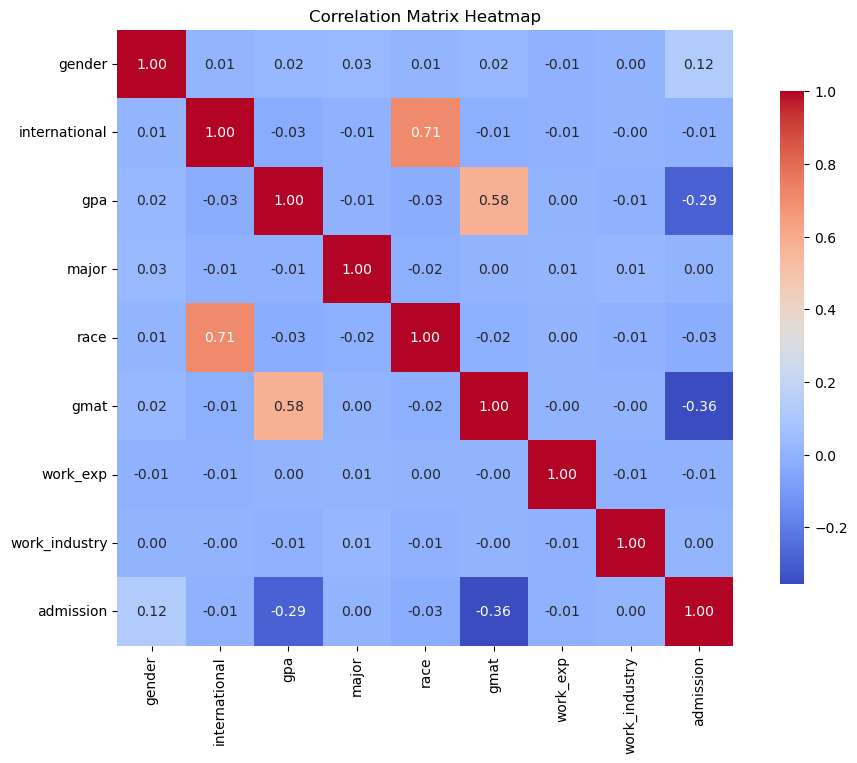

In [41]:
#13
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix Heatmap')
plt.show()

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [ ]:
# prompt: make a model classification

# Separate features and target variable

# Split the data into training and testing sets

# Create a Decision Tree Classifier

# Train the model

# Make predictions on the test set

# Evaluate the model


Accuracy: 0.7828894269572235


In [ ]:
# Get the average GPA

# Create Lisa's data as a dictionary

# Create a DataFrame with Lisa's data

# Encode categorical features for Lisa's data

# Make a prediction using the trained model

# Decode the prediction back to the original label


Prediction for Lisa's admission: Finance
